In [15]:
import numpy as np
from matplotlib import pylab as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
# load breast cancer dataset
breastCancer = datasets.load_breast_cancer()

In [3]:
# get data and targets
X = breastCancer.data
y = breastCancer.target

In [5]:
X.shape

(569, 30)

In [42]:
print(sum(y == 0))
print(sum(y == 1))
# here you can tell we do not have an even amount of malignant and benign labels

212
357


In [6]:
breastCancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
breastCancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
# benign = non cancerous
# malignant = cancerous


In [11]:
# going to use a K nearest Neighbors algorithm I wrote
# this is the distance method
def distance(x1, x2):
    return np.linalg.norm(x1-x2)
  

In [12]:
class k_nearest_neighbor:
  def __init__(self):
        pass
  def fit(self, X, y):
     self.X = X
     self.y = y
  def get_nearest(self, x, k):
    # get the list of distances
    distances = [(distance(x, self.X[i]), i) for i in range(len(self.X))]
    # sort distances by distance
    distances = sorted(distances, key=lambda x : x[0])
    # first k elements
    distances = distances[0:k]
    # convert into a list of classes
    k_classes = [self.y[i[1]] for i in distances]
    # find and return the class that is most common, choose 1 if there is a tie
    return max(set(k_classes), key=k_classes.count)

  def predict(self, x, k):
    return self.get_nearest(x, k)

In [37]:
# this is a function to fit a model, print and return the accuracy given a test train split
def run_k_nearest_neighbors(k, X_train, y_train, X_test, y_test) :
  # create and fit a k nearest neighbor model object
    knn = k_nearest_neighbor()
    knn.fit(X_train, y_train)
    # get the predicted values
    y_pred = np.array([knn.predict(X_test[i],k) for i in range(len(X_test))])
    # get the accuracy and return it
    acc = np.sum(y_pred == y_test)/len(y_test)
    print(f'The accuracy is {acc:.3f}')
    return acc

In [26]:
# lets split the data into test and train sets
testSize = 0.60
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize, shuffle=True, random_state=69)

In [27]:
# lets run model for multiple k values and see the accuracy results
for i in range(1,8):
  acc = run_k_nearest_neighbors(i, X_train, y_train, X_test, y_test)
  print(f'For k equals {i} the accuracy is {acc:.4f}')

For k equals 1 the accuracy is 0.9211
For k equals 2 the accuracy is 0.8977
For k equals 3 the accuracy is 0.9298
For k equals 4 the accuracy is 0.9327
For k equals 5 the accuracy is 0.9298
For k equals 6 the accuracy is 0.9240
For k equals 7 the accuracy is 0.9327


In [28]:
# Not Bad.... Should we try with Principle Component Analysis?

In [30]:
from sklearn.decomposition import PCA

def find_subspace (X_train, X_test, subspace_dims) :
  # create pca object
  pca = PCA(n_components=subspace_dims)
  #fit the pca object with the data
  pca.fit(X_train)
  # transform the data set into components of size subspace_dims
  Xs = pca.transform(X_train)
  Xs_test = pca.transform(X_test)
  return Xs, Xs_test, pca

In [34]:
def generate_accuracy_for_sizes(X_train, y_train, X_test, y_test, dims_min = 2, dims_max = 30) :
  # create accuracy array
  acc = []
  # loop through specified dimensions
  for i in range(dims_min, dims_max):
    # find/create subspaces
    Xs_train, Xs_test, pvs = find_subspace(X_train, X_test, i)
    # run k nearest neighbor model and get accuracy
    accuracy = run_k_nearest_neighbors(1, Xs_train, y_train, Xs_test, y_test)
    # add accuracy and subspace dimension to list
    acc.append([i, accuracy])
  # return list as np array
  return np.array(acc)

In [32]:
def plot_subspace_size_vs_accuracy (X_train, y_train, X_test, y_test) :
    accs = generate_accuracy_for_sizes(X_train, y_train, X_test, y_test)
    plt.plot(accs[:,0], accs[:,1])
    plt.xlabel('Subspace Size')
    plt.ylabel('Test Set Accuracy')
    pass

The accuracy is 0.909
The accuracy is 0.915
The accuracy is 0.924
The accuracy is 0.921
The accuracy is 0.921
The accuracy is 0.921
The accuracy is 0.921
The accuracy is 0.921
The accuracy is 0.921
The accuracy is 0.921
The accuracy is 0.921
The accuracy is 0.921
The accuracy is 0.921
The accuracy is 0.921
The accuracy is 0.921
The accuracy is 0.921
The accuracy is 0.921
The accuracy is 0.921
The accuracy is 0.921
The accuracy is 0.921
The accuracy is 0.921
The accuracy is 0.921
The accuracy is 0.921
The accuracy is 0.921
The accuracy is 0.921
The accuracy is 0.921
The accuracy is 0.921
The accuracy is 0.921


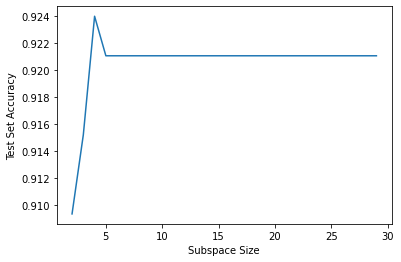

In [38]:
# lets run our model with pca dimensions of 2 - 30
plot_subspace_size_vs_accuracy (X_train, y_train, X_test, y_test) 

In [43]:
'''Using Principle Component Analysis it appears that the max accuracy we achieved was 0.924 with the majority being 0.921.
This is promising because we can drastically reduce the run time of this model by PCA'''

'Using Principle Component Analysis it appears that the max accuracy we achieved was 0.924 with the majority being 0.921.\nThis is promising because we can drastically reduce the run time of this model by PCA'